In [23]:
import pandas as pd
import numpy as np
import math as mt
from numpy import dot
from numpy.linalg import norm
from scipy import stats
from sklearn.decomposition import TruncatedSVD 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import IPython.display

sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

def euclidean_distance(A, B):
    err = 0
    length = len(A)
    for idx in range(0, length):
        tmp = ((A[idx] - B[idx]) ** 2)
        err += tmp
        
    return mt.sqrt(err)

def cosine_similarity(A,B):
    return dot(A, B) / (norm(A) * norm(B))

def sumDiffer(A,B):
    length = len(A)
    err = 0
    for idx in range(0, length):
        err += ((A[idx] - B[idx]) ** 2)
    return mt.sqrt(err / length)

def improved_similarity(A, B, w):
    cos_sim = cosine_similarity(A, B)
    sum_diff = sumDiffer(A, B)
    w **= sum_diff
    
    return cos_sim * w

## Compare Improved Cosine Similarity, Pearson Correlation Coefficient Matrix Factorization based
- 행렬분해의 기법 중, 차원축소를 통해서 원본 행렬보다 적은 정보량을 가지고 있는 행렬을 만들어 냈을 때, 성능 상 잘 동작하는 유사도 알고리즘을 확인해보기 위한 테스트
- keyword : TruncatedSVD, Pearson Correlation Coefficient, Improved Cosine Similarity
- 상관계수 로직으로 뽑아낸 각 벡터들의 모든 벡터들과의 상관계수 데이터들의 특정 표준편차 n% 설정
- 향상된 코사인 유사도 로직으로 뽑아낸 각 벡터들의 모든 벡터들과의 상관계수 데이터들의 특정 표준편차 n% 설정

<AxesSubplot:>

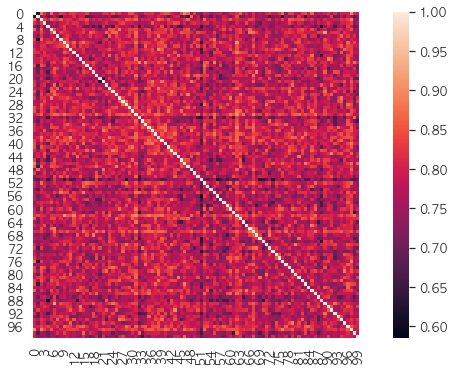

In [98]:
datas = np.round((np.random.rand(100,64) * 500))
SVD = TruncatedSVD(n_components=32)
factor_datas = SVD.fit_transform(datas)
# factor_datas = datas

corr_map = np.array([])
for A in factor_datas:
    _ = np.array([])
    for B in factor_datas:
        corr = stats.pearsonr(A,B)[0]
        _ = np.append(_, corr)
    corr_map = np.append(corr_map,[_])
corr_map = corr_map.reshape(100,100)

sns.heatmap(corr_map, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            square=True, #차트를 정사각형으로 할 것인지
           )

<AxesSubplot:>

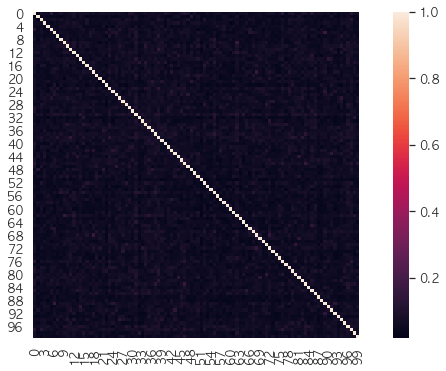

In [99]:
imp_map = np.array([])
for A in factor_datas:
    _ = np.array([])
    for B in factor_datas:
        imp = improved_similarity(A,B,0.99)
        _ = np.append(_, imp)
    imp_map = np.append(imp_map,[_])
imp_map = imp_map.reshape(100,100)

sns.heatmap(imp_map, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            square=True, #차트를 정사각형으로 할 것인지
           )

In [100]:
# 피어슨 상관계수 유사도의 추천서비스로 인해 나온 값
cols = ['유클리디안 거리', '코사인 유사도', '향상된 코사인 유사도']
corr_rec_idx = corr_map.sum(axis=0).argmax()

A = datas[corr_rec_idx]
B_values = np.delete(datas,corr_rec_idx, axis=0)

corr_anal_df = pd.DataFrame(columns=cols)
for idx,B in enumerate(B_values):
    corr_anal_df.loc[idx] = [
        euclidean_distance(A,B),
        cosine_similarity(A,B),
        improved_similarity(A, B, 0.99)
    ]

print("평균 유클리디안 거리 : {}".format(corr_anal_df[cols[0]].mean()))
print("평균 코사인 유사도 : {}".format(corr_anal_df[cols[1]].mean()))
print("평균 향상된 코사인 유사도 : {}\n".format(corr_anal_df[cols[2]].mean()))
corr_anal_df

평균 유클리디안 거리 : 1534.5611731889926
평균 코사인 유사도 : 0.7891245027439342
평균 향상된 코사인 유사도 : 0.11626462916419716



,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
0,1673.257900,0.743944,0.090910
1,1528.734771,0.784990,0.115023
2,1485.645314,0.817897,0.126511
3,1675.671507,0.733757,0.089393
4,1558.072848,0.769608,0.108689
...,...,...,...
94,1653.564030,0.749581,0.093893
95,1339.826108,0.840814,0.156203
96,1509.500911,0.804575,0.120776
97,1673.776867,0.733095,0.089525


In [101]:
# 향상된 코사인 유사도의 추천 서비스로 인해 나온 값
imp_rec_idx = imp_map.sum(axis=0).argmax()

A = datas[imp_rec_idx]
B_values = np.delete(datas,imp_rec_idx, axis=0)

imp_anal_df = pd.DataFrame(columns=cols)
for idx,B in enumerate(B_values):
    imp_anal_df.loc[idx] = [
        euclidean_distance(A,B),
        cosine_similarity(A,B),
        improved_similarity(A, B, 0.99)
    ]

print("평균 유클리디안 거리 : {}".format(imp_anal_df[cols[0]].mean()))
print("평균 코사인 유사도 : {}".format(imp_anal_df[cols[1]].mean()))
print("평균 향상된 코사인 유사도 : {}\n".format(imp_anal_df[cols[2]].mean()))
imp_anal_df

평균 유클리디안 거리 : 1534.5611731889926
평균 코사인 유사도 : 0.7891245027439342
평균 향상된 코사인 유사도 : 0.11626462916419716



,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
0,1673.257900,0.743944,0.090910
1,1528.734771,0.784990,0.115023
2,1485.645314,0.817897,0.126511
3,1675.671507,0.733757,0.089393
4,1558.072848,0.769608,0.108689
...,...,...,...
94,1653.564030,0.749581,0.093893
95,1339.826108,0.840814,0.156203
96,1509.500911,0.804575,0.120776
97,1673.776867,0.733095,0.089525
